The goal of the competition is to predict house prices based on the features of the dataset. I used the Ames dataset as well as the dataset provided for the competition, as they both have more or less the same features.

- Find me on LinkedIn (and give me an internship please): https://www.linkedin.com/in/clement-florval/

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_rows', 82) # 81 columns in the dataset (makes it easier to view)
pd.set_option('display.max_columns', 82)

df_ames = pd.read_csv('Data/AmesHousing.csv')
df_train = pd.read_csv('Data/train.csv')
df_test = pd.read_csv('Data/test.csv')

- I need to change the feautire names of the Ames Dataset so it matches the feature names of the competition dataset. I will do that in the next cell.

In [13]:
df_ames = df_ames.drop(['Order', 'PID'], axis = 1)
df_train = df_train.drop('Id', axis = 1)
cols_dic = dict(zip(df_ames.columns, df_train.columns))
df_ames = df_ames.rename(columns=cols_dic)
df_train = pd.concat([df_train, df_ames])

- Dropping duplicates

In [14]:
df_train = df_train.drop_duplicates()
df_train = df_train.reset_index().drop('index', axis=1)
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [15]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


- That's the preprocessing done, now onto feature engineering.

### Target variable

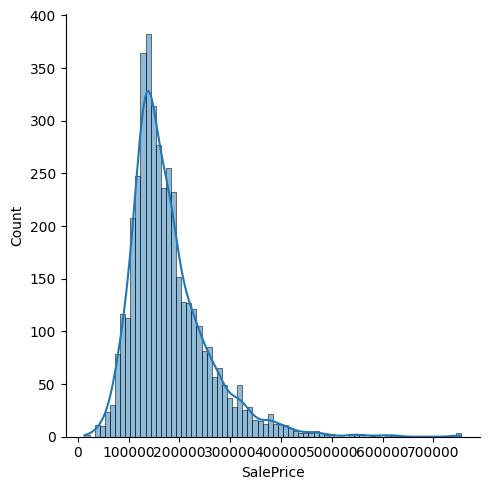

In [16]:
sns.displot(df_train['SalePrice'], kde=True)
plt.show()

- We can see that the target variable is left-skewed. We will transform it to make it more normally distributed.

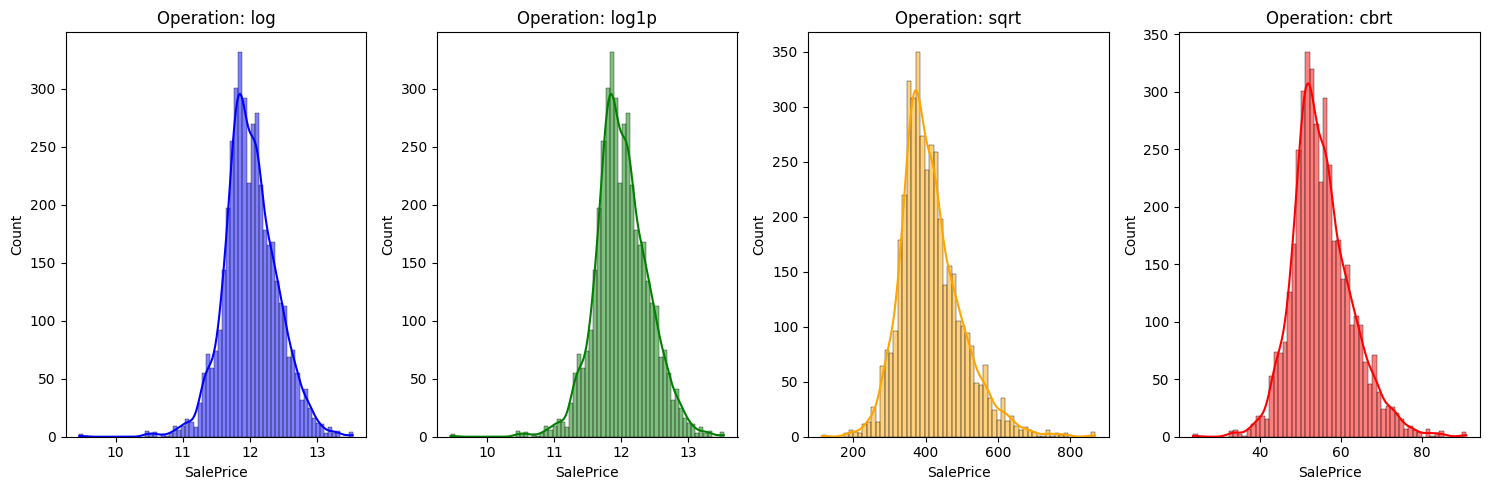

In [17]:
operation = [np.log, np.log1p, np.sqrt, np.cbrt]
colors = ['blue', 'green', 'orange', 'red']

fig, axes = plt.subplots(1, 4, figsize=(15, 5))
axes = axes.flatten()

for i, op in enumerate(operation):
    df_operations = df_train.copy()
    transformed_data = op(df_operations['SalePrice'])
    sns.histplot(transformed_data, kde=True, ax=axes[i], color=colors[i])
    axes[i].set_title(f"Operation: {op.__name__}")

plt.tight_layout()
plt.show()

- No real difference between the operation, I'll use the log transformation.

In [18]:
df_train['SalePrice'] = df_train['SalePrice'].apply(np.log)

### Missing values

In [19]:
# I'll define a function to get a dataframe with the overview of the missing values in the dataset

def missing_data_overview(data):
    zeros_count = (data == 0).sum()
    nan_count = data.isnull().sum()
    none_count = (data == "None").sum()
    
    # Combine the counts into a DataFrame
    total_count = zeros_count + nan_count + none_count
    percent_missing = 100 * total_count / len(data)
    
    missing_df = pd.DataFrame({
        'zeros': zeros_count,
        'np.nan': nan_count,
        'None': none_count,
        'total': total_count,
        'Percent': percent_missing,
        'Type': data.dtypes
    })

    # Filter out features with a total count of 0
    missing_df = missing_df[missing_df['total'] > 0]
    
    # Sort by Percent in descending order
    missing_df = missing_df.sort_values(by='Percent', ascending=False)
    missing_df.index.name = 'Feature'

    # Transpose the DataFrame for easier visualization
    missing_df = missing_df.T

    return missing_df

In [20]:
missing_data_overview(df_train)

Feature,PoolQC,PoolArea,3SsnPorch,LowQualFinSF,MiscVal,MiscFeature,BsmtHalfBath,Alley,ScreenPorch,BsmtFinSF2,EnclosedPorch,Fence,HalfBath,MasVnrType,MasVnrArea,BsmtFullBath,2ndFlrSF,WoodDeckSF,FireplaceQu,Fireplaces,OpenPorchSF,BsmtFinSF1,LotFrontage,BsmtUnfSF,GarageYrBlt,GarageFinish,GarageQual,GarageCond,GarageCars,GarageArea,GarageType,BsmtExposure,BsmtFinType2,BsmtQual,TotalBsmtSF,BsmtFinType1,BsmtCond,FullBath,BedroomAbvGr,KitchenAbvGr,Electrical
zeros,0,4178,4141,4132,4046,0,3945,0,3837,3689,3546,0,2638,0,2526,2443,2384,2192,0,2033,1901,1313,0,352,0,0,0,0,230,230,0,0,0,0,114,0,0,20,14,4,0
np.nan,4178,0,0,0,0,4042,2,3920,0,1,0,3363,0,2562,28,2,0,0,2033,0,0,1,735,1,232,232,232,232,1,1,230,119,117,115,1,115,115,0,0,0,2
None,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
total,4178,4178,4141,4132,4046,4042,3947,3920,3837,3690,3546,3363,2638,2562,2554,2445,2384,2192,2033,2033,1901,1314,735,353,232,232,232,232,231,231,230,119,117,115,115,115,115,20,14,4,2
Percent,99.547296,99.547296,98.665714,98.451275,96.402192,96.306886,94.043364,93.400048,91.422445,87.919943,84.488921,80.128663,62.85442,61.043603,60.85299,58.255897,56.802478,52.227782,48.439361,48.439361,45.294258,31.308077,17.512509,8.41077,5.527758,5.527758,5.527758,5.527758,5.503931,5.503931,5.480105,2.835359,2.787706,2.740052,2.740052,2.740052,2.740052,0.476531,0.333572,0.095306,0.047653
Type,object,int64,int64,int64,int64,object,float64,object,int64,float64,int64,object,int64,object,float64,float64,int64,int64,object,int64,int64,float64,float64,float64,float64,object,object,object,float64,float64,object,object,object,object,float64,object,object,int64,int64,int64,object


### What we need to do:

- Impute missing values: Mean or Most frequent imputation depending on the feature.
- Create new features based on existing features: For example: 'Porch' = 'OpenPorchSF' + 'EnclosedPorch' + '3SsnPorch' + 'ScreenPorch'.
- Remove useless features, features with an overwhelming amount of missing values.

In [21]:
# I'll start by dropping the useless columns that we won't use for feature engineering for easier data manipulation

cols_to_drop = ['PoolQC', 'PoolArea', 'MiscFeature', 'MiscVal', 'Alley', 'Fence', 'WoodDeckSF', 'FireplaceQu', 'Fireplaces', 'MasVnrType', 'MasVnrArea']
df_train = df_train.drop(cols_to_drop, axis=1)
df_test = df_test.drop(cols_to_drop, axis=1)

df_train.shape, df_test.shape

((4197, 69), (1459, 69))

In [22]:
# I'll use the SimpleImputer on categorical and numerical features

from sklearn.impute import SimpleImputer

# Get the categorical and numerical columns (using types selected to many columns so I had to hardcode the columns)
categorical_cols = ['GarageFinish', 'GarageQual', 'GarageCond', 'MSZoning', 'Utilities', 'Functional', 'Exterior2nd', 'Exterior1st', 'SaleType', 'KitchenQual']
numerical_cols = ['BsmtFullBath', 'BsmtHalfBath', 'GarageCars', 'GarageArea', 'TotalBsmtSF', 'BsmtUnfSF', 'BsmtFinSF2', 'BsmtFinSF1']

cat_imputer_train = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df_train.loc[:, categorical_cols] = cat_imputer_train.fit_transform(df_train.loc[:, categorical_cols])
df_test.loc[:, categorical_cols] = cat_imputer_train.fit_transform(df_test.loc[:, categorical_cols])

num_imputer_train = SimpleImputer(missing_values=np.nan, strategy='mean')
df_train.loc[:, numerical_cols] = num_imputer_train.fit_transform(df_train.loc[:, numerical_cols])
df_test.loc[:, numerical_cols] = num_imputer_train.fit_transform(df_test.loc[:, numerical_cols])

In [23]:
# Now I'll create the features by combining feaures that are related together

df_train['Bath_total'] = df_train['FullBath'] + 0.5*df_train['HalfBath'] + df_train['BsmtFullBath'] + 0.5*df_train['BsmtHalfBath']
df_test['Bath_total'] = df_test['FullBath'] + 0.5*df_test['HalfBath'] + df_test['BsmtFullBath'] + 0.5*df_test['BsmtHalfBath']

df_train['BsmtFinSF'] = df_train['BsmtFinSF1'] + df_train['BsmtFinSF2'] - df_train['BsmtUnfSF']
df_test['BsmtFinSF'] = df_test['BsmtFinSF1'] + df_test['BsmtFinSF2'] - df_test['BsmtUnfSF']

df_train['Porch'] = df_train['OpenPorchSF'] + df_train['EnclosedPorch'] + df_train['3SsnPorch'] + df_train['ScreenPorch']
df_test['Porch'] = df_test['OpenPorchSF'] + df_test['EnclosedPorch'] + df_test['3SsnPorch'] + df_test['ScreenPorch']

df_train['FinSF'] = df_train['1stFlrSF'] + df_train['2ndFlrSF'] - df_train['LowQualFinSF']
df_test['FinSF'] = df_test['1stFlrSF'] + df_test['2ndFlrSF'] - df_test['LowQualFinSF']

In [24]:
# Now I can drop the columns that I used to create the new features

cols_to_drop = ['FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF']
df_train = df_train.drop(cols_to_drop, axis=1)
df_test = df_test.drop(cols_to_drop, axis=1)

In [25]:
# We can check on the missing values again

missing_data_overview(df_train)

Feature,Porch,LotFrontage,GarageYrBlt,GarageType,GarageCars,GarageArea,BsmtFinSF,BsmtExposure,BsmtFinType2,BsmtQual,BsmtCond,BsmtFinType1,TotalBsmtSF,BedroomAbvGr,KitchenAbvGr,Electrical
zeros,1295,0,0,0,230,230,147,0,0,0,0,0,114,14,4,0
np.nan,0,735,232,230,0,0,0,119,117,115,115,115,0,0,0,2
None,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
total,1295,735,232,230,230,230,147,119,117,115,115,115,114,14,4,2
Percent,30.855373,17.512509,5.527758,5.480105,5.480105,5.480105,3.502502,2.835359,2.787706,2.740052,2.740052,2.740052,2.716226,0.333572,0.095306,0.047653
Type,int64,float64,float64,object,float64,float64,float64,object,object,object,object,object,float64,int64,int64,object


- With all those changes the highest percentage of missing values is 30.8% for 'Porch'. This is a great improvement.

### Categorical features

- Dates are categorical features, we will transform them into numerical features (with a 10 year interval).

In [26]:
# Converting the dates

date_cols = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']
df_train[date_cols] = round(df_train[date_cols]/10)*10
df_test[date_cols] = round(df_test[date_cols]/10)*10

- Checking if the the test dataset has the same categories as the training dataset. If not, we will have to match the categories to avoid errors

In [27]:
def check_feature(feature):
    try:
        train_unique, test_unique = set(df_train[feature].unique()), set(df_test[feature].unique())
        if test_unique & train_unique != train_unique:
            print(f"Test set has different unique values for {feature} than the training set")
            print(f"Unique values in test set: {test_unique - train_unique}")
        else:
            print(f"Test set has the same unique values for {feature} as the training set")
        print("\n")
    except:
        print(f"Feature {feature} is not in the test set")
        print("\n")

for feature in df_train.columns:
    check_feature(feature)

Test set has the same unique values for MSSubClass as the training set


Test set has different unique values for MSZoning than the training set
Unique values in test set: set()


Test set has different unique values for LotFrontage than the training set
Unique values in test set: {nan}


Test set has different unique values for LotArea than the training set
Unique values in test set: set()


Test set has the same unique values for Street as the training set


Test set has the same unique values for LotShape as the training set


Test set has the same unique values for LandContour as the training set


Test set has different unique values for Utilities than the training set
Unique values in test set: set()


Test set has the same unique values for LotConfig as the training set


Test set has the same unique values for LandSlope as the training set


Test set has different unique values for Neighborhood than the training set
Unique values in test set: set()


Test set has the same uniqu

- No conflicting categories, we will be able to encode easily.

- I'll check for values that are almost unique (>80% of the values are the same) and remove them.

In [28]:
non_diverse_features = []

def check_diversity(feature):
    train_value_counts = df_train[feature].value_counts(normalize=True)
    if (train_value_counts > 0.8).sum() > 0:
        non_diverse_features.append(feature)

for feature in df_train.columns:
    check_diversity(feature)

print(f"Non diverse features: {non_diverse_features}")

# I'll drop the non diverse features
df_train = df_train.drop(non_diverse_features, axis=1)
df_test = df_test.drop(non_diverse_features, axis=1)

Non diverse features: ['Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'RoofMatl', 'ExterCond', 'BsmtCond', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'KitchenAbvGr', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleCondition']


### Encoding the data

- We will use ordinal encoding for some features, and for other categorival features.

In [30]:
import category_encoders as ce

categorical_cols = df_train.select_dtypes(include='object').columns
catboost_encoder = ce.CatBoostEncoder()

catboost_encoder.fit(df_train[categorical_cols], df_train['SalePrice'])
df_train[categorical_cols] = catboost_encoder.transform(df_train[categorical_cols])
df_test[categorical_cols] = catboost_encoder.transform(df_test[categorical_cols])

ModuleNotFoundError: No module named 'category_encoders'

In [ ]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,TotalBsmtSF,HeatingQC,GrLivArea,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,MoSold,YrSold,SaleType,SalePrice,Bath_total,BsmtFinSF,Porch,FinSF
0,60,12.076388,65.0,8450,11.914794,11.991942,12.169479,12.161408,7,5,2000.0,2000.0,11.972589,12.203726,12.203591,12.303148,12.252504,12.174625,11.944100,12.294353,856.0,12.196715,1710,3,12.212112,8,12.151564,2000.0,12.163733,2.0,548.0,2,2008,11.991077,12.247694,3.5,556.0,61,1710
1,20,12.076388,80.0,9600,11.914794,12.018549,12.355473,11.985543,6,8,1980.0,1980.0,11.972589,11.861523,11.869456,11.834139,11.867427,12.174625,12.382556,11.962338,1262.0,12.196715,1262,3,11.809169,6,12.151564,1980.0,12.163733,2.0,460.0,5,2007,11.991077,12.109011,2.5,694.0,0,1262
2,60,12.076388,68.0,11250,12.172900,11.991942,12.169479,12.161408,7,5,2000.0,2000.0,11.972589,12.203726,12.203591,12.303148,12.252504,12.174625,12.067876,12.294353,920.0,12.196715,1786,3,12.212112,6,12.151564,2000.0,12.163733,2.0,608.0,9,2008,11.991077,12.317167,3.5,52.0,42,1786
3,70,12.076388,60.0,9550,12.172900,12.010626,12.192566,12.161408,7,5,1920.0,1970.0,11.972589,11.834868,11.871809,11.834139,11.705462,11.812136,11.944100,11.962338,756.0,11.909802,1717,3,12.212112,7,11.758417,2000.0,11.779254,3.0,642.0,2,2006,11.991077,11.849398,2.0,-324.0,307,1717
4,60,12.076388,84.0,14260,12.172900,12.018549,12.668495,12.161408,8,5,2000.0,2000.0,11.972589,12.203726,12.203591,12.303148,12.252504,12.174625,12.143217,12.294353,1145.0,12.196715,2198,4,12.212112,9,12.151564,2000.0,12.163733,3.0,836.0,12,2008,11.991077,12.429216,3.5,165.0,84,2198


In [ ]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,TotalBsmtSF,HeatingQC,GrLivArea,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,MoSold,YrSold,SaleType,Bath_total,BsmtFinSF,Porch,FinSF
0,1461,20,11.769765,80.0,11622,11.914794,11.991942,11.866763,11.985543,5,6,1960.0,1960.0,11.972589,12.203726,12.203591,11.834139,11.867427,11.812136,11.9441,11.836519,882.0,11.802717,896,2,11.809169,5,12.151564,1960.0,11.779254,1.0,730.0,6,2010,11.991077,1.0,342.0,120,896
1,1462,20,12.076388,81.0,14267,12.172900,12.010626,11.866763,11.985543,6,6,1960.0,1960.0,12.184188,11.834868,11.836000,11.834139,11.867427,11.812136,11.9441,11.962338,1329.0,11.802717,1329,3,12.212112,6,12.151564,1960.0,11.779254,1.0,312.0,6,2010,11.991077,1.5,517.0,36,1329
2,1463,60,12.076388,74.0,13830,12.172900,11.991942,12.145231,12.161408,5,5,2000.0,2000.0,11.972589,12.203726,12.203591,11.834139,12.252504,12.174625,11.9441,12.294353,928.0,11.909802,1629,3,11.809169,6,12.151564,2000.0,12.306223,2.0,482.0,3,2010,11.991077,2.5,654.0,34,1629
3,1464,60,12.076388,78.0,9978,12.172900,11.991942,12.145231,12.161408,6,6,2000.0,2000.0,11.972589,12.203726,12.203591,11.834139,12.252504,11.812136,11.9441,12.294353,926.0,12.196715,1604,3,12.212112,7,12.151564,2000.0,12.306223,2.0,470.0,6,2010,11.991077,2.5,278.0,36,1604
4,1465,120,12.076388,43.0,5005,12.172900,11.991942,12.570606,11.985543,8,5,1990.0,1990.0,11.972589,11.951102,11.960955,12.303148,12.252504,12.174625,11.9441,11.962338,1280.0,12.196715,1280,2,12.212112,5,12.151564,1990.0,12.163733,2.0,506.0,1,2010,11.991077,2.0,-754.0,226,1280


### Modeling

In [ ]:
# Splitting the data into train and test sets to test that the model works

from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = df_train.drop('SalePrice', axis=1)
y = df_train['SalePrice']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model = XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=4, max_depth=8)

model.fit(X_train, y_train, early_stopping_rounds=5, eval_set=[(X_val, y_val)], verbose=False)

y_pred = model.predict(X_val)
mse = mean_squared_error(y_val, y_pred)

print(y_pred[:10])

print(f"Mean Squared Error: {mse}")

[11.653163 11.884769 12.013107 12.180956 12.205434 12.071457 12.108374
 13.530816 12.139404 12.084181]
Mean Squared Error: 0.006680226663835049


In [ ]:
# For submission I'll train the model on the entire dataset

X = df_train.drop('SalePrice', axis=1)
y = df_train['SalePrice']

# Seting max_depth to 24 ?
model = XGBRegressor(n_estimators=3000, learning_rate=0.05, n_jobs=4, max_depth=24)

model.fit(X, y, early_stopping_rounds=5, eval_set=[(X, y)], verbose=False)

y_pred = model.predict(df_test.drop('Id', axis=1))

submission = pd.DataFrame({'Id': range(1461,2920), 'SalePrice': np.exp(y_pred)})
submission = submission.set_index('Id')
submission.to_csv('submission.csv')